# Testing our new classifier on a selection of cases

This notebook demonstrates:

1) Extracting features from previously unseen samples

2) Using probabalistic class prediction output to label the samples

3) Importance of scale on the classification output

Text(0.5,1,'Reflectivity valid at 1100 UTC on 7 May 1997')

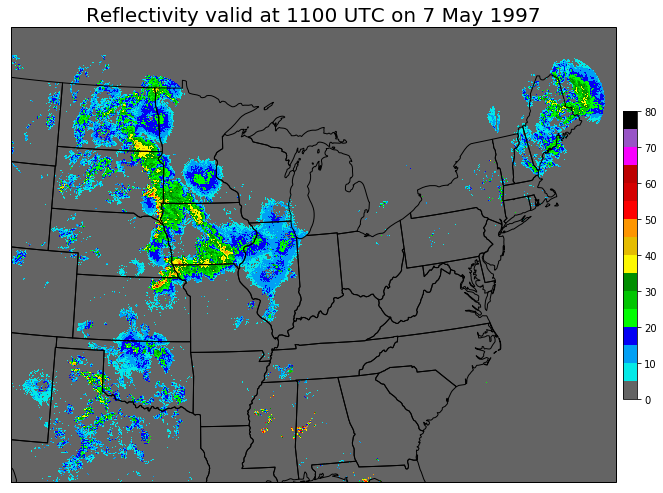

In [1]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from utils.colors import radar_colormap
from skimage.measure import regionprops
from utils.mapping_help import *
from utils.features import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 10

data_location = "../data"

to_proj = ccrs.AlbersEqualArea(central_longitude=-95, central_latitude=38.0000)
from_proj = ccrs.PlateCarree()

img = imread(data_location + "/radar_data/BREF_970507_1100.png", pilmode='P')

view = generate_view(-105, -70, 30, 50, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 1100 UTC on 7 May 1997", fontsize=20)

# Read in our classifier

In [2]:
rf_clf = pickle.load(open(data_location + "/classifiers/my_random_forest.pkl", 'rb'))

# Zoom in on northern MCS

MCS: 82.0%

area:47988
convex_area:99652
eccentricity:0.8611731503820806
intense_area:828
convection_area:4584
convection_stratiform_ratio:0.09552388097024256
intense_stratiform_ratio:0.0172543135783946
intense_convection_ratio:0.1806282722513089
mean_intensity:27.553971826289903
max_intensity:55
intensity_variance:49.74129392702154
major_axis_length:417.3661656505153
minor_axis_length:212.15211368419367
solidity:0.4815558142335327
filename:None


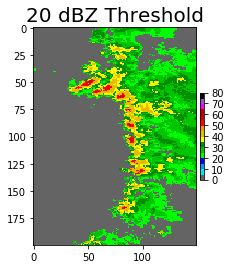

In [3]:
labels = ['MCS', 'Unorganized', 'Tropical', 'Synoptic', 'Clutter']

def example_properties(img, classifier, xmin, xmax, ymin, ymax):
    
    orig = img[ymin:ymax, xmin:xmax]
    thresh = 1*(orig>=4)

    props = regionprops(thresh, intensity_image=orig)[0]

    features = calc_features(props=props)

    ax = plt.subplot(1, 1, 1)
    mmp = ax.imshow(thresh*orig*5, norm=norm, cmap=cmap)
    ax.set_title("20 dBZ Threshold", fontsize=20)
    plt.colorbar(mmp, ax=ax, shrink=0.4, pad=0.01)

    feature_vector = np.array([features[feature] for feature in feature_list[:-1]])

    class_name = classifier.predict(feature_vector.reshape(1,-1))[0]
    proba = classifier.predict_proba(feature_vector.reshape(1,-1))[0]

    perc = float(proba[np.argmax(proba)])*100

    print(labels[class_name] +  ": %.1f" % perc + '%\n')
    [print(x + ":" + str(y)) for (x, y) in features.items()];

example_properties(img, rf_clf, 1650, 1800, 450, 650)

# Zoom in on southern MCS

MCS: 90.0%

area:25600
convex_area:52180
eccentricity:0.8869520583562198
intense_area:956
convection_area:4960
convection_stratiform_ratio:0.19375
intense_stratiform_ratio:0.03734375
intense_convection_ratio:0.19274193548387097
mean_intensity:30.69140625
max_intensity:65
intensity_variance:70.02586364746094
major_axis_length:299.0960992977554
minor_axis_length:138.1409733881198
solidity:0.4906094288999617
filename:None


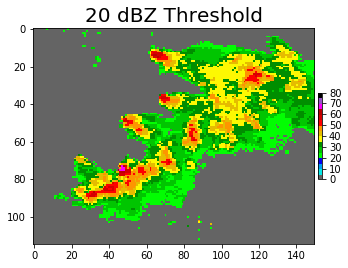

In [4]:
example_properties(img, rf_clf, 1700, 1850, 660, 775)

# Zoom out from two MCS cases

Synoptic: 65.0%

area:244148
convex_area:1134596
eccentricity:0.8890594168898875
intense_area:1812
convection_area:14296
convection_stratiform_ratio:0.05855464718121795
intense_stratiform_ratio:0.007421727804446483
intense_convection_ratio:0.12674874090654728
mean_intensity:26.392106427249047
max_intensity:65
intensity_variance:41.75848611295851
major_axis_length:1430.5682230082473
minor_axis_length:654.902434789549
solidity:0.21518496451600394
filename:None


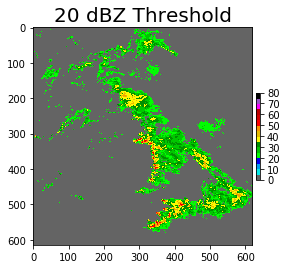

In [5]:
example_properties(img, rf_clf, 1400, 2020, 185, 800)

# Zoom in on unorganized cluster

Unorganized: 52.0%

area:10400
convex_area:37700
eccentricity:0.9341317795734828
intense_area:124
convection_area:1336
convection_stratiform_ratio:0.12846153846153846
intense_stratiform_ratio:0.011923076923076923
intense_convection_ratio:0.09281437125748503
mean_intensity:27.630769230769232
max_intensity:55
intensity_variance:58.59828402366864
major_axis_length:330.3117933717292
minor_axis_length:117.89763014025421
solidity:0.27586206896551724
filename:None


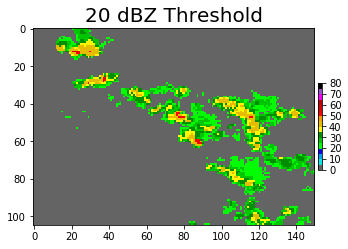

In [6]:
example_properties(img, rf_clf, 1450, 1600, 945, 1050)

Text(0.5,1,'Reflectivity valid at 0520 UTC on 1 April 2008')

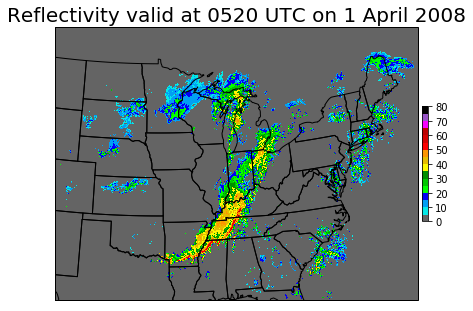

In [7]:
img = imread(data_location + "/radar_data/BREF_080401_0520.png", pilmode='P')

view = generate_view(-105, -70, 30, 50, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 0520 UTC on 1 April 2008", fontsize=20)

# Zoom in on squall line

MCS: 93.0%

area:222040
convex_area:508848
eccentricity:0.9361147757222045
intense_area:10640
convection_area:73744
convection_stratiform_ratio:0.33212033867771573
intense_stratiform_ratio:0.04791929382093316
intense_convection_ratio:0.144282924712519
mean_intensity:33.12214015492704
max_intensity:65
intensity_variance:74.77845234641677
major_axis_length:1059.7454667089596
minor_axis_length:372.70681075612333
solidity:0.43635820520076724
filename:None


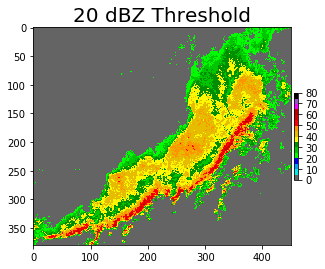

In [8]:
example_properties(img, rf_clf, 1900, 2350, 720, 1100)

Text(0.5,1,'Reflectivity valid at 1000 UTC on 29 August 2005')

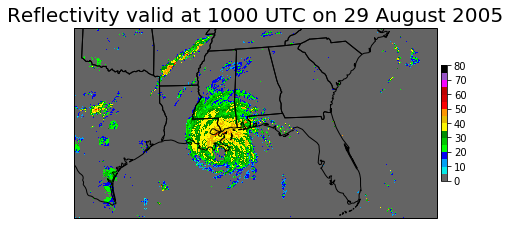

In [9]:
img = imread(data_location + "/radar_data/BREF_050829_1030.png", pilmode='P')

view = generate_view(-100, -75, 25, 35, from_proj, to_proj)

cmap = radar_colormap()
classes = list(range(0, 85, 5))
norm = BoundaryNorm(classes, ncolors=cmap.N, clip=True)
lons, lats = get_NOWrad_conus_lon_lat()
lons, lats = np.meshgrid(lons, lats)
mmp = view.pcolormesh(lons, lats, img*5, cmap=cmap, norm=norm, transform=from_proj)

plt.colorbar(mmp, ax=view, shrink=0.4, pad=0.01)

plt.title("Reflectivity valid at 1000 UTC on 29 August 2005", fontsize=20)

# Zoom in on Katrina

Tropical: 94.0%

area:215148
convex_area:474308
eccentricity:0.42297241098730354
intense_area:304
convection_area:24276
convection_stratiform_ratio:0.1128339561604105
intense_stratiform_ratio:0.0014129808317995055
intense_convection_ratio:0.012522656121272038
mean_intensity:29.381356089761468
max_intensity:50
intensity_variance:43.44246051809569
major_axis_length:592.0436564323477
minor_axis_length:536.4759546347861
solidity:0.45360398728252527
filename:None


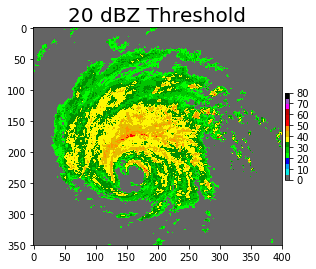

In [10]:
example_properties(img, rf_clf, 1950, 2350, 1100, 1450)

# Zoom in on some clutter in Texas

Clutter: 100.0%

area:9388
convex_area:19036
eccentricity:0.8365436865301867
intense_area:0
convection_area:0
convection_stratiform_ratio:0
intense_stratiform_ratio:0
intense_convection_ratio:0
mean_intensity:21.61482743928419
max_intensity:30
intensity_variance:5.8925453792556075
major_axis_length:188.2840627460727
minor_axis_length:103.16088102487228
solidity:0.4931708342088674
filename:None


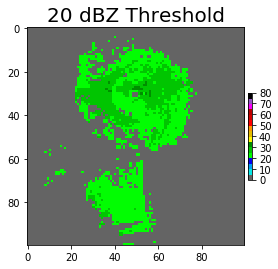

In [11]:
example_properties(img, rf_clf, 1650, 1750, 1375, 1475)